# Implementing a 3-layer Neural Network

In [1]:
import numpy as np

In [2]:
inp_size = 2 #no of features
layers=[4,3] #no of neurons in first and second layer (hidden layers)
out_size=2 #size of output layer

In [3]:
class Neural_Network:
    
    #1. Neural Network Architecture
    def __init__(self,isize,layers,osize):
        np.random.seed(0)
        
        model={}
        model['w1']=np.random.randn(isize,layers[0]) # matrix for first hidden layer
        model['w2']=np.random.randn(model['w1'].shape[1],layers[1]) #matrix for second hidden layer
        model['w3']=np.random.randn(model['w2'].shape[1],osize) #matrix for output layer
        
        model['b1']=np.zeros((1,layers[0])) #bias for first hidden layer
        model['b2']=np.zeros((1,layers[1])) #bias for second hidden layer
        model['b3']=np.zeros((1,osize)) #bias for output layer
        
        self.model=model
    
    #2. Forward Propagation - Passing data to the neural network created
    def For_prop(self,inp_x):
        
        #Unpacking all the values from dictionary
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']

        #First Hidden Layer
        z1 = np.dot(inp_x,w1) + b1
        a1 = np.tanh(z1) #Transforms value in range -1 to 1
        
        #Second Hidden Layer
        z2=np.dot(a1,w2) + b2
        a2= np.tanh(z2)
        
        #Output Layer
        z3=np.dot(a2,w3) + b3
        y_hat = cal_soft(z3) #Softmax Function : defined later
        
        #Store outputs
        self.outputs=(a1,a2,y_hat)
        return y_hat
    
    #3. Back Propagation
    def back_prop(self,x,y,lr=0.001):
        #Unpacking all the values from dictionary
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,y_hat = self.outputs
        
        m=x.shape[0] #input is of mxn size m data points(no of inp layer neurons) and n features for each m
        
        #Compute values for final output layer first        
        delta3 = y_hat-y
        delta3_w = np.dot(a2.T,delta3)
        delta3_b = np.sum(delta3,axis=0)
        
        #second hidden layer
        delta2 = (1-np.square(a2))*np.dot(delta3,w3.T)
        delta2_w = np.dot(a1.T,delta2)
        delta2_b = np.sum(delta2,axis=0)
        
        #first hidden layer
        delta1 = (1-np.square(a1))*np.dot(delta2,w2.T)
        delta1_w = np.dot(x.T,delta1)
        delta1_b = np.sum(delta1,axis=0)
        
        #Update Values using Gradient descent
        self.model['w1'] -= lr*delta1_w
        self.model['b1'] -= lr*delta1_b
        self.model['w2'] -= lr*delta2_w
        self.model['b2'] -= lr*delta2_b
        self.model['w3'] -= lr*delta3_w
        self.model['b3'] -= lr*delta3_b
    
    #4. Predict Function
    def predict(self,x):
        y_hat=self.For_prop(x)
        return np.argmax(y_hat,axis=1)
    
    #5. A function which provides details about model created
    def print_info(self):
        
        #Unpacking all the values from dictionary
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        a1,a2,y_hat = self.outputs
        
        print("W1: ",w1.shape)
        print("A1: ",a1.shape)
        print("W2: ",w2.shape)
        print("A2: ",a2.shape)
        print("W3: ",w3.shape)
        print("Y_hat: ",y_hat.shape)

In [4]:
#Softmax Function
def cal_soft(a):
    num=np.exp(a)
    den=np.sum(num,axis=1,keepdims=True)
    return (num/den)

In [5]:
# Loss Function
def cal_loss(y_hat,p):
    l=(-1)*np.mean(y_hat*np.log(p))
    return l

In [6]:
# One hot Encoding
def one_hot_encoding(output_matrix,depth):
    m=output_matrix.shape[0]
    y_hot = np.zeros((m,depth))
    y_hot[np.arange(m),output_matrix]=1
    
    return y_hot

# Create a dataset for the Neural Network

In [7]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [8]:
x_data,y_data=make_moons(n_samples=500,noise=0.2,random_state=1)

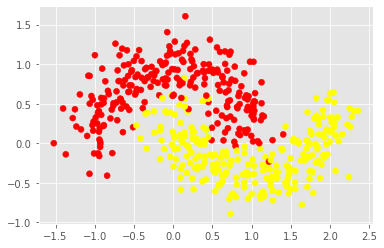

In [9]:
plt.style.use('ggplot')
plt.scatter(x_data[:,0],x_data[:,1],c=y_data,cmap=plt.cm.autumn)
plt.show()

# Understanding one hot encoding - Test

In [10]:
print(y_data)

[1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 1 0 

In [11]:
y_data_onehot=one_hot_encoding(y_data,3)
print(y_data_onehot)

# we are going to put this data into our neural network not the original data

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# Training the Neural Network

In [12]:
# create model object
my_model = Neural_Network(isize=2,layers=[10,5],osize=2)

#passing just one example 
my_model.For_prop([x_data[0]])

array([[0.57184075, 0.42815925]])

In [13]:
# this gave probability of the data point belonging to class 0 and 1 resp

In [14]:
my_model.For_prop(x_data)

array([[0.57184075, 0.42815925],
       [0.60407261, 0.39592739],
       [0.55427229, 0.44572771],
       [0.56316529, 0.43683471],
       [0.51347301, 0.48652699],
       [0.52625255, 0.47374745],
       [0.58681454, 0.41318546],
       [0.55140683, 0.44859317],
       [0.44304572, 0.55695428],
       [0.5746224 , 0.4253776 ],
       [0.59585733, 0.40414267],
       [0.28142214, 0.71857786],
       [0.58476722, 0.41523278],
       [0.56957706, 0.43042294],
       [0.57739651, 0.42260349],
       [0.4437089 , 0.5562911 ],
       [0.53114011, 0.46885989],
       [0.65630714, 0.34369286],
       [0.29044369, 0.70955631],
       [0.36998844, 0.63001156],
       [0.55044557, 0.44955443],
       [0.60332429, 0.39667571],
       [0.70661074, 0.29338926],
       [0.51847369, 0.48152631],
       [0.56374029, 0.43625971],
       [0.59239382, 0.40760618],
       [0.55540615, 0.44459385],
       [0.65029832, 0.34970168],
       [0.35364876, 0.64635124],
       [0.3971028 , 0.6028972 ],
       [0.

In [15]:
my_model.print_info()

W1:  (2, 10)
A1:  (500, 10)
W2:  (10, 5)
A2:  (500, 5)
W3:  (5, 2)
Y_hat:  (500, 2)


In [16]:
# Create a training function
def train_nnwk(x,y,epochs,lr,logs=True):
    losses=[]
    class_no = 2
    y_data_onehot=one_hot_encoding(y,2)
    for i in range(epochs):
        y_hat=my_model.For_prop(x)
        l=cal_loss(y_data_onehot,y_hat)
        my_model.back_prop(x,y_data_onehot,lr)
        
        if(logs):
            print("Loss at epoch ",i," is: ",l)
            losses.append(l)
    return losses

In [17]:
l=train_nnwk(x_data,y_data,500,0.001)

Loss at epoch  0  is:  0.3983576725902345
Loss at epoch  1  is:  0.20915611871167852
Loss at epoch  2  is:  0.17632996617765012
Loss at epoch  3  is:  0.15785927033024827
Loss at epoch  4  is:  0.14578188904618272
Loss at epoch  5  is:  0.1371322292625187
Loss at epoch  6  is:  0.13060173850573628
Loss at epoch  7  is:  0.12591883213732116
Loss at epoch  8  is:  0.1232092013251893
Loss at epoch  9  is:  0.1248779972172707
Loss at epoch  10  is:  0.12992852939032795
Loss at epoch  11  is:  0.15226219635672186
Loss at epoch  12  is:  0.15195305546374777
Loss at epoch  13  is:  0.18691756778403484
Loss at epoch  14  is:  0.13217574973913515
Loss at epoch  15  is:  0.14327615823031892
Loss at epoch  16  is:  0.11378695138794405
Loss at epoch  17  is:  0.11760979687633225
Loss at epoch  18  is:  0.10528820681863041
Loss at epoch  19  is:  0.10815145130242973
Loss at epoch  20  is:  0.10050353458084513
Loss at epoch  21  is:  0.10341816674350872
Loss at epoch  22  is:  0.0972567322641142
Los

Loss at epoch  271  is:  0.038105660116579954
Loss at epoch  272  is:  0.03807750060108954
Loss at epoch  273  is:  0.03808807638998482
Loss at epoch  274  is:  0.038059867029079784
Loss at epoch  275  is:  0.038070948979378516
Loss at epoch  276  is:  0.03804264922250883
Loss at epoch  277  is:  0.038054229789756346
Loss at epoch  278  is:  0.03802579978908578
Loss at epoch  279  is:  0.03803786725815554
Loss at epoch  280  is:  0.038009268018595804
Loss at epoch  281  is:  0.03802180621756718
Loss at epoch  282  is:  0.037992999796559415
Loss at epoch  283  is:  0.03800598783949003
Loss at epoch  284  is:  0.037976937597172904
Loss at epoch  285  is:  0.037990349667935505
Loss at epoch  286  is:  0.03796102056704866
Loss at epoch  287  is:  0.03797482575703224
Loss at epoch  288  is:  0.037945184710303455
Loss at epoch  289  is:  0.03795934692299801
Loss at epoch  290  is:  0.03792936318387378
Loss at epoch  291  is:  0.03794384111906032
Loss at epoch  292  is:  0.037913486709505846


In [18]:
l

[0.3983576725902345,
 0.20915611871167852,
 0.17632996617765012,
 0.15785927033024827,
 0.14578188904618272,
 0.1371322292625187,
 0.13060173850573628,
 0.12591883213732116,
 0.1232092013251893,
 0.1248779972172707,
 0.12992852939032795,
 0.15226219635672186,
 0.15195305546374777,
 0.18691756778403484,
 0.13217574973913515,
 0.14327615823031892,
 0.11378695138794405,
 0.11760979687633225,
 0.10528820681863041,
 0.10815145130242973,
 0.10050353458084513,
 0.10341816674350872,
 0.0972567322641142,
 0.10060404317291156,
 0.09486679873193692,
 0.09886551025964876,
 0.09301112895884733,
 0.09774403042463198,
 0.0914348257865591,
 0.09683085430555953,
 0.08991264800680542,
 0.09576530705541271,
 0.08828833390628352,
 0.09433295755278442,
 0.08651005881501586,
 0.0925181726291948,
 0.08461658631901395,
 0.0904485192042807,
 0.08268606948112128,
 0.0882881850895103,
 0.08078966509068967,
 0.08616397096293894,
 0.07897204781414961,
 0.084146010967433,
 0.07725247431309785,
 0.08225915965635923,

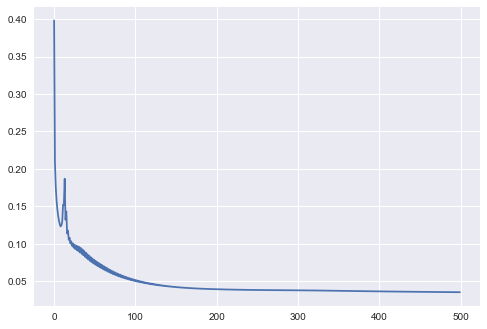

In [23]:
plt.plot(l)
plt.show()

In [20]:
from visualize import plot_decision_boundary

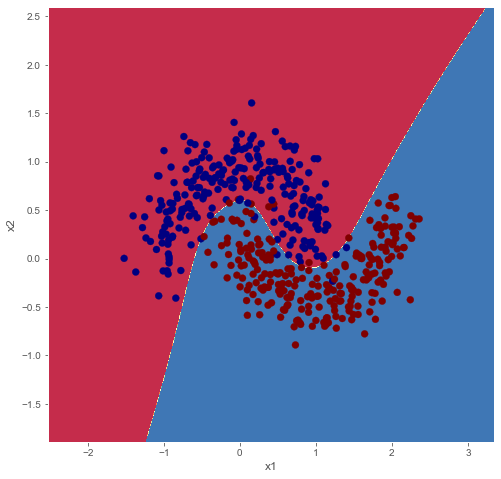

In [21]:
plot_decision_boundary(lambda x:my_model.predict(x),x_data,y_data)

In [24]:
from sklearn.datasets import make_circles

In [87]:
x_data,y_data=make_circles(n_samples=400,noise=0.5,random_state=4)

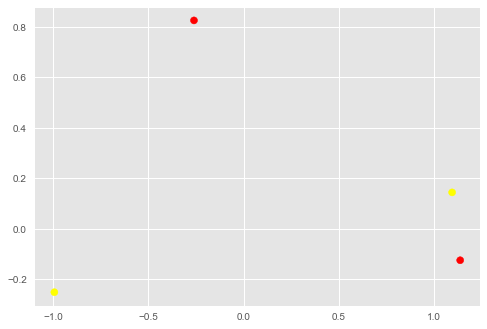

In [88]:
plt.style.use('ggplot')
plt.scatter(x_data[:,0],x_data[:,1],c=y_data,cmap=plt.cm.autumn)
plt.show()

In [89]:
my_model.For_prop(x_data)

array([[0.29528131, 0.70471869],
       [0.50909191, 0.49090809],
       [0.51066781, 0.48933219],
       [0.31133369, 0.68866631]])

In [90]:
l=train_nnwk(x_data,y_data,500,0.001)

Loss at epoch  0  is:  0.3728332035590215
Loss at epoch  1  is:  0.3724002690493745
Loss at epoch  2  is:  0.3719721919045561
Loss at epoch  3  is:  0.37154895995786547
Loss at epoch  4  is:  0.37113056030632485
Loss at epoch  5  is:  0.3707169792986512
Loss at epoch  6  is:  0.3703082025240962
Loss at epoch  7  is:  0.36990421480219127
Loss at epoch  8  is:  0.3695050001734414
Loss at epoch  9  is:  0.3691105418910007
Loss at epoch  10  is:  0.36872082241336623
Loss at epoch  11  is:  0.3683358233981199
Loss at epoch  12  is:  0.3679555256967466
Loss at epoch  13  is:  0.3675799093505534
Loss at epoch  14  is:  0.367208953587713
Loss at epoch  15  is:  0.36684263682144513
Loss at epoch  16  is:  0.36648093664935844
Loss at epoch  17  is:  0.366123829853955
Loss at epoch  18  is:  0.36577129240431333
Loss at epoch  19  is:  0.36542329945894847
Loss at epoch  20  is:  0.36507982536985195
Loss at epoch  21  is:  0.3647408436877091
Loss at epoch  22  is:  0.364406327168285
Loss at epoch  

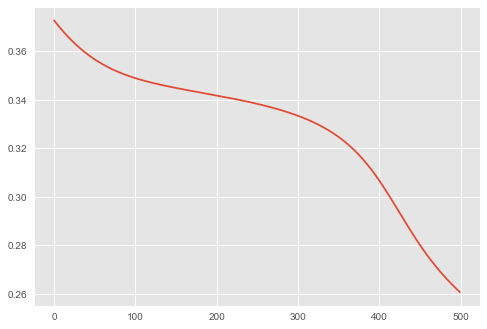

In [91]:
plt.plot(l)
plt.show()

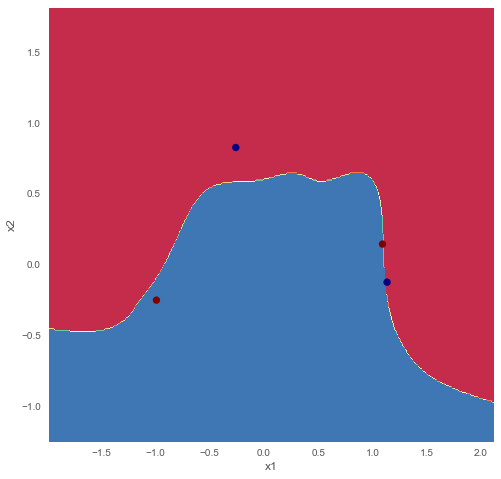

In [92]:
plot_decision_boundary(lambda x:my_model.predict(x),x_data,y_data)